(1, 640, 640, 3)


/Users/leochen/Developer/senior-design/.venv/lib/python3.11/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_2095']. Received: the structure of inputs=*
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
{'boxes': array([[[ 1.51629471e+02,  1.27962311e+02,  1.20243942e+02,
          1.20091812e+02],
        [ 3.67947906e+02,  4.15885925e+02,  1.20150787e+02,
          1.19607849e+02],
        [ 1.58321304e+01,  5.28825928e+02,  1.19785820e+02,
          1.19292664e+02],
        [ 4.02027359e+01,  4.00138977e+02,  1.19409050e+02,
          1.19975037e+02],
        [ 1.92112183e+02,  1.04099876e+02,  1.19852783e+02,
          1.20029762e+02],
        [ 2.37951736e+01,  3.60170197e+02,  1.19989189e+02,
          1.19602448e+02],
        [ 2.41454887e+01,  4.32238922e+02,  1.19594727e+02,
          1.20064728e+02],
        [ 1.03891441e+02, -1.59131927e+01,  1.20090111e+02,
          1.20035736e+02],
        [ 4.78208313e+01,  3.60254578e+02,  1.19853165e+02,
          1.19881348e+02],
        [ 1.27743858e+02,  3.60622620e+02,  1.20071281e+02,
          1.19233032e+02],
        [ 1.51575272e+02,  3.12256012e+02,  1.20512558e+02,
          1.19677979e+02

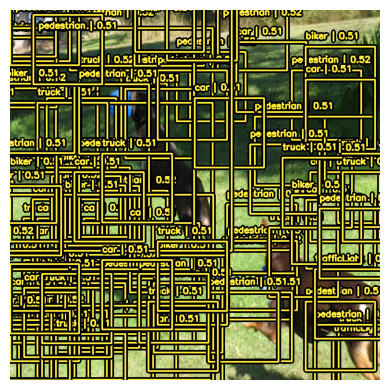

In [6]:
import keras
import keras_cv
import tensorflow as tf

model = keras_cv.models.YOLOV8Detector(
    backbone=keras_cv.models.YOLOV8Backbone.from_preset(
        'yolo_v8_l_backbone_coco'),
    num_classes=5,
    bounding_box_format='XYWH',
    fpn_depth=2,
    # label_encoder=None,
    # prediction_decoder=None,
)

images = keras.utils.load_img(
    path='test.jpg',
    color_mode='rgb',
    target_size=None,
    interpolation='nearest',
    keep_aspect_ratio=False,
)

images = keras.utils.img_to_array(images)
images = keras.layers.Resizing(640, 640)(images)
images = keras.ops.reshape(x=images, newshape=(1, *images.shape))
print(images.shape)


predictions: dict = model.predict(images)
print(predictions)
print(keras.ops.shape(predictions['boxes']))

class_ids = [
    "car",
    "pedestrian",
    "trafficLight",
    "biker",
    "truck",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

y_pred = model.predict(images)
# y_pred = keras_cv.bounding_box.to_ragged(y_pred)
keras_cv.visualization.plot_bounding_box_gallery(
    images,
    value_range=(0, 255),
    bounding_box_format='XYWH',
    y_true=None,
    y_pred=y_pred,
    scale=4,
    rows=1,
    cols=1,
    show=True,
    font_scale=0.5,
    class_mapping=class_mapping,
)